# Part II: Tapqir analysis (Colab)

This tutorial is a Jupyter notebook that illustrates steps involved in Tapqir analysis. To work with the live version of the notebook run it in Google Colab using the link above.

**Note**: Jupyter notebook is a Python environment. It can also run shell commands with the ! sign prepended to the command (or sometimes % sign for jupyter [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

## Set up the environment

* Change runtime to GPU (in the menu select `Runtime -> Change runtime type -> GPU`)
* Connect Google Drive to be able to save the analysis output (to view Files & Folders click on a Folder icon on the left):

In [5]:
# Run this cell to connect to Google Drive
from google.colab import drive

drive.mount("/content/drive")
# change directory to MyDrive
%cd drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


* Run the cell below to install `tapqir` (takes about a minute):

In [2]:
!pip install --quiet git+https://github.com/gelles-brandeis/tapqir.git#egg=tapqir[colab] > install.log

## Initialize folder

To start the analysis create an empty folder (here named `tutorial`), change directory to the newly created folder, and initialize it by running `tapqir init` inside the new folder:

In [6]:
# create a new directory
%mkdir tutorial
# change direcotry
%cd tutorial
# initialize tapqir
!tapqir init

/content/drive/MyDrive/tutorial
Initialized Tapqir in the working directory.
---------------------------------------------------------------
- Checkout the documentation: <https://tapqir.readthedocs.io/>
- Get help on our forum: <https://github.com/gelles-brandeis/tapqir/discussions>


`tapqir init` command has created a `.tapqir` sub-folder that will store internal files such as `config.yml` configuration file, `loginfo` logging file, and model checkpoints.

In [7]:
# list all files (including hidden files)
%ls -alh

total 4.0K
drwx------ 2 root root 4.0K Dec  5 21:40 .tapqir/


## Download input data

This data was acquired with Glimpse and pre-processed with [imscroll](https://github.com/gelles-brandeis/CoSMoS_Analysis/wiki) program ([Friedman et al., 2015](https://dx.doi.org/10.1016/j.ymeth.2015.05.026)). Let’s download data files using [wget](https://www.gnu.org/software/wget/) and then unzip files:

The raw input data are:

* `garosen00267` - folder containing image data in glimpse format and header files
* `green_DNA_locations.dat` - aoiinfo file designating target molecule (DNA) locations in the binder channel
* `green_nonDNA_locations.dat` - aoiinfo file designating off-target (nonDNA) locations in the binder channel
* `green_driftlist.dat` - driftlist file recording the stage movement that took place during the experiment

In [8]:
%%capture
# Download and unzip raw input files
!wget https://zenodo.org/record/5659927/files/DatasetA_glimpse.zip
!unzip DatasetA_glimpse.zip && rm DatasetA_glimpse.zip

## Extract AOIs

Extract AOIs from raw images using `tapqir glimpse` command which will run interactively:

In [11]:
!tapqir glimpse

Dataset name [Rpb1SNAP549]: Rpb1SNAP549
AOI image size - number of pixels along the axis [14]: 
Number of color channels [1]: 
Overwrite defaults values? [Y/n]: 
Specify frame range? [Y/n]: 
First frame to include in the analysis [1]: 
Last frame to include in the analysis [790]: 

INPUTS FOR CHANNEL #0

Channel name [SNAP549]: 
Header/glimpse folder [/content/drive/MyDrive/tutorial/DatasetA_glimpse/garosen00267]: 
Target molecule locations file [/content/drive/MyDrive/DatasetA_glimpse/green_DNA_locations.dat]: /content/drive/MyDrive/tutorial/DatasetA_glimpse/green_DNA_locations.dat
Add off-target AOI locations? [Y/n]: y
Off-target control locations file [/content/drive/MyDrive/DatasetA_glimpse/green_nonDNA_locations.dat]: /content/drive/MyDrive/tutorial/DatasetA_glimpse/green_nonDNA_locations.dat
Driftlist file [/content/drive/MyDrive/DatasetA_glimpse/green_driftlist.dat]: /content/drive/MyDrive/tutorial/DatasetA_glimpse/green_driftlist.dat
Extracting AOIs ...
100% 790/790 [00:10<00:0

Above we specified

* A dataset name (`Rpb1SNAP549`)
* Size of AOI images (we recommend to use `14` pixels)
* First and last frames included in the analysis (`1` and `790`). If starting and ending frames are not specified then the full range of frames from the driftlist file will be analyzed
* The number of color channels (`1`)
* Locations of input files for each color channel (only one color channel in this example).

> **About indexing**. In Python indexing starts with 0. We stick to this convention and index AOIs, frames, color channels, and pixels starting with 0. Note, however, that in the `tapqir glimpse` command above for frame numbers we used `1` and `790` which are according to Matlab indexing convention (in Matlab indexing starts with 1) since driftlist file was produced using the Matlab script.

Great! The program has outputted `data.tpqr` file containing extracted AOI images (N=331 target and Nc=526 off-target control locations), the camera offset empirical distirbution sample values and their weights:

In [ ]:
# list current folder content
%ls

total 1.1G
-rw------- 1 root root 1.1G Sep 20 22:06 data.tpqr
drwx------ 3 root root 4.0K Aug 20 19:39 Rpb1SNAP549_glimpse/
drwx------ 2 root root 4.0K Sep 20 22:06 .tapqir/


![ontarget AOIs](/content/drive/MyDrive/tutorial/ontarget-channel0.png)

Additionally, the program has saved

* Image files (`ontarget-channel0.png` and `offtarget-channel0.png`) displaying locations of on-target and off-target AOIs in the first frame (make sure that AOIs are inside the FOV):

  ![ontarget AOIs](/content/drive/MyDrive/tutorial/ontarget-channel0.png)

* Location from the dark corner of the image (`offset-channel0.png`) used to create the offset empirical distribution (make sure that offset region is outside the FOV):

* The intensity distribution histograms for offset and data from different channels (`offset-distribution.png`):

* Offset median change (offset distribution shouldn’t drift over time) (`offset-medians.png`):

## Fit the data

Now the data is ready for analysis. We will fit the data to the time-independent `cosmos` model ([Ordabayev et al., 2021](https://doi.org/10.1101/2021.09.30.462536)):

In [ ]:
!tapqir fit

Tapqir model (cosmos) [cosmos]: 
Channel numbers (space separated if multiple) [0]: 
Run computations on GPU? [Y/n]: 
AOI batch size [10]: 
Frame batch size [512]: 
Learning rate [0.005]: 
Number of iterations [0]: 
Save parameters in matlab format? [y/N]: 
Overwrite defaults values? [Y/n]: 
INFO - Iteration #39200. Loaded a model checkpoint from /content/drive/MyDrive/tutorial/.tapqir
Fitting the data ...
  0% 0/100000 [00:00<?, ?it/s][pyKeOps] Initializing build folder for dtype=float64 and lang=torch in /root/.cache/pykeops-1.5-cpython-37 ... done.
[pyKeOps] Compiling libKeOpstorchfc3462e783 in /root/.cache/pykeops-1.5-cpython-37:
       formula: Max_SumShiftExp_Reduction(wj+Log(Step(xi-gj-IntCst(1)))+(ai-IntCst(1))*Log(IfElse(xi-gj-IntCst(1),xi-gj,xi))-bi*(xi-gj),0)
       aliases: wj = Vj(0,1); gj = Vj(1,1); ai = Vi(2,1); bi = Vi(3,1); xi = Vi(4,1); 
       dtype  : float64
... 
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures

Options that we selected:

* Model - the default single-color time-independent model (`cosmos`).
* Color channel number - first chanel (`0`) (there is only one color channel in this data)
* Run computations on GPU: yes (`y`).
* AOI batch size - use default (`10`).
* Frame batch size - use default (`512`).
* Learning rate - use default (`0.005`).
* Number of iterations - use default (`0`)

> **About batch size**. In theory, batch size should impact _training time_ and _memory consumption_, but not the _performance_. It can be optimized for a particular GPU hardware by trying different batch size values and comparing training time/memory usage (`nvidia-smi` shell command shows Memory-Usage and GPU-Util values). In particular, if there is a memory overflow you can decrease either frame batch size (e.g., to `128` or `256`) or AOI batch size (e.g., to `5`).

> **About number of iterations**. Fitting the data requires many iterations (about 50,000-100,000) until parameters converge. Setting the number of iterations to 0 will run the program till Tapqir’s custom convergence criteria is satisfied. We recommend to set it to 0 (default) and then run for additional number of iterations if required. Convergence of global parameters can be visually checked using tensorboard.

The program will save a checkpoint every 200 iterations (checkpoint is saved at `.tapqir/cosmos-channel0-model.tpqr`). Starting the program again will resume from the last saved checkpoint. The program can be stopped using `Ctrl-C`. At every checkpoint the values of global variational parameters (`-ELBO`, `gain_loc`, `proximity_loc`, `pi_mean`, `lamda_loc`) are also recorded for visualization by tensorboard. Plateaued plots signify convergence.

After fitting is finished the program computes 95% credible intervals of model parameters and saves them in `cosmos-channel0-params.tqpr` and `cosmos-channel0-summary.csv` files.

### Tensorboard

To monitor fitting progress (variational parameters vs number of iterations) use tensorboard. [More](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks) on using tensorboard in notebooks. Run the program until `-ELBO`, `gain_loc`, `lamda_loc`, `pi_mean`, `proximity_loc` values converge.

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir .

For illustration purposes, below is a saved image of tensorboard output after all the runs above have completed. We can see that `-ELBO` is decreasing as expected. `gain_loc` went up and then down and then plateaued (converged). Notice that `gain_loc` is changing only during the run of the marginal model (first 54,100+10,000 iterations) and then is fixed during the run of the full model (last 15,000 iterations).

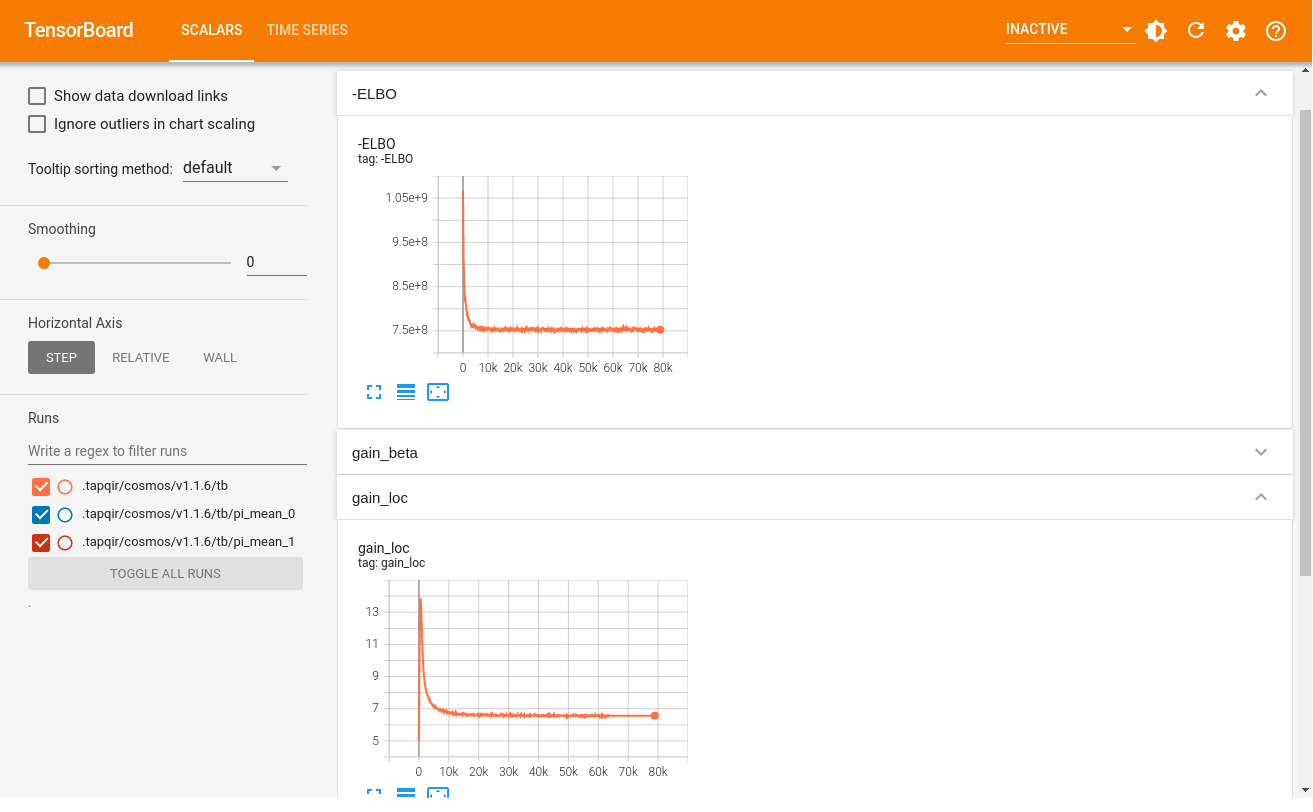

In [ ]:
from IPython.display import Image

Image("http://centaur.biochem.brandeis.edu/tensorboard.png", width=1200)

### Posterior distributions

Model variational parameters are saved in `.tapqir` folder. To obtain 95% credible intervals use `tapqir stats` command which will save the output in `cosmos-params.tpqr` file (PyTorch format). Use `--matlab` flag to save the output in Matlab format as well (`cosmos-params.mat` file). Additionally, values of global model parameters are also saved in `cosmos-summary.csv` file which is easier to access (with Excel or any text editor).